# Assignment 4: Sampling 
--------------------------
**Dr. Dave Wanik - University of Connecticut**

Let's try to do three styles of sampling with code. 

For this assignment, I'd like you to apply the topics of  undersampling, oversampling and SMOTE to a toy dataset to see if you get better performance by using these sampling methods. In my experience, sampling helps sometimes but not all times. 

# Data
Everybody will have the same dataset.

In [69]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [70]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


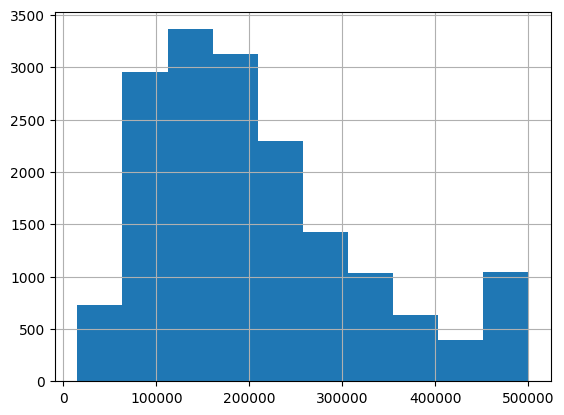

In [71]:
import matplotlib.pyplot as plt

df['median_house_value'].hist()
plt.show()

In [72]:
# create a new target variable for SMOTE
import numpy as np

# nice imbalanced data!
df['median_house_value'] = np.where(df['median_house_value'] < 380000, 1, 0)
df['median_house_value'].value_counts()

1    15304
0     1696
Name: median_house_value, dtype: int64

In [73]:
# Alternative methods to find median house value greater than 380000(1) and less than 380000(0)
from collections import Counter
Counter(df['median_house_value'])

Counter({1: 15304, 0: 1696})

In [74]:
df.info()
# This shows there is no categorical data and there is no missing value in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


# (5 pts) Split data into train and test 
Remember, your dataset should be split into train and test FIRST so that the test dataset retains the original distribution of 0s and 1s. No SMOTE data in the test partition - your boss only cares about real rows!

In [75]:
#Splitting the data into training and testing
y = df['median_house_value']
X = df.loc[:,'longitude':'median_income']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13600, 8) (3400, 8) (13600,) (3400,)


In [76]:
#Counting number of zeros and 1s in training dataset
print(Counter(y_train))
# For undersampling
# Number of zeroes are way less than number of 1s, hence we will undersample the data(majority, i.e. number of 1s) to 1344 
# For oversampling
# I am increasing number of zeroes to the calue number of ones(basically oversampling)
print(Counter(y_test))

Counter({1: 12256, 0: 1344})
Counter({1: 3048, 0: 352})


# (15 pts) Majority Undersampling
Perform majority undersampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

In [77]:
# use imblearn to perform majority undersampling on X_train, evaluate on test partition
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state =42, sampling_strategy='majority')
# fitting it to training data and applying the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)
# Summarize the class distribution 
print(Counter(y_under))

Counter({0: 1344, 1: 1344})


In [78]:
# for original data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
DTC = DecisionTreeClassifier(min_samples_split=10)
# original data
DTC.fit(X_train, y_train)
train_preds = DTC.predict(X_train)
test_preds = DTC.predict(X_test)

print('Train results: \n')
print(classification_report(y_train, train_preds))
print('Test results: \n')
print(classification_report(y_test, test_preds))
print("--------------------------------------------------")
print("Accuracy: ", accuracy_score(y_test,test_preds))

Train results: 

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1344
           1       0.99      0.99      0.99     12256

    accuracy                           0.98     13600
   macro avg       0.94      0.95      0.95     13600
weighted avg       0.98      0.98      0.98     13600

Test results: 

              precision    recall  f1-score   support

           0       0.56      0.61      0.59       352
           1       0.95      0.94      0.95      3048

    accuracy                           0.91      3400
   macro avg       0.76      0.78      0.77      3400
weighted avg       0.91      0.91      0.91      3400

--------------------------------------------------
Accuracy:  0.9105882352941177


In [79]:
#Keenly observe the precision, recall, and f1-score values for both the classes (0 and 1).  I notices that the 1 class has higher score values than the 0 class. The scores need to be almost uniform for both the classes to ensure we can trust the model.

In [80]:
# model performance of under-sampling data
DTC.fit(X_under, y_under)
train_preds = DTC.predict(X_under)
test_preds = DTC.predict(X_test)
print('Train results: \n')
print(classification_report(y_under, train_preds))
print('Test results: \n')
print(classification_report(y_test, test_preds))
print("---------------------------------------------------")
print("accuracy score", accuracy_score(y_test, test_preds))

Train results: 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1344
           1       0.96      0.94      0.95      1344

    accuracy                           0.95      2688
   macro avg       0.95      0.95      0.95      2688
weighted avg       0.95      0.95      0.95      2688

Test results: 

              precision    recall  f1-score   support

           0       0.36      0.86      0.51       352
           1       0.98      0.82      0.90      3048

    accuracy                           0.83      3400
   macro avg       0.67      0.84      0.70      3400
weighted avg       0.92      0.83      0.86      3400

---------------------------------------------------
accuracy score 0.8282352941176471


In [81]:
#From the classification report(considering training data), I observed the recall, and f1-score values for the 0 class.It is clearly visible that scores have improved compared to using the imbalanced dataset:
# precison score increased from 0.89 to 0.92
# recall increased from 0.92 to 0.96
# F-1 score increased from 0.90 to 0.95
# Also the accuracy weighted average is incresed from 0.91 to 0.92 for testing data

# (15 pts) Minority Oversampling
Perform minority oversampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

In [82]:
# use imblearn to perform minority oversampling on X_train, evaluate on test partition
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy= 'minority')
# fitting it to training data and applying the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
# Summarize the class distribution with the help of Counter method
print(Counter(y_over))

Counter({0: 12256, 1: 12256})


In [83]:
# model performance of oversampled data
DTC.fit(X_over, y_over)
train_preds = DTC.predict(X_over)
test_preds = DTC.predict(X_test)
print('Train results: \n')
print(classification_report(y_over, train_preds))
print('Test results: \n')
print(classification_report(y_test, test_preds))
print("---------------------------------------------------")
print("accuracy score", accuracy_score(y_test, test_preds))

Train results: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12256
           1       1.00      1.00      1.00     12256

    accuracy                           1.00     24512
   macro avg       1.00      1.00      1.00     24512
weighted avg       1.00      1.00      1.00     24512

Test results: 

              precision    recall  f1-score   support

           0       0.57      0.58      0.58       352
           1       0.95      0.95      0.95      3048

    accuracy                           0.91      3400
   macro avg       0.76      0.76      0.76      3400
weighted avg       0.91      0.91      0.91      3400

---------------------------------------------------
accuracy score 0.9117647058823529


In [84]:
# From the above report it is clearly intutive that for traing data the precision, recall, and F1 score has significantly increased for both of the classes.
# While the accuracy remained same for both the original data and oversampled data.
# One more 

# (15 pts) SMOTE
Perform synthetic minority oversampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

In [85]:
# use imblearn to perform synthetic minority data on X_train, evaluate on test partition
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
Counter(y_res)


Counter({0: 12256, 1: 12256})

In [86]:
# model performance of SMOTE data
DTC.fit(X_res, y_res)
train_preds = DTC.predict(X_res)
test_preds = DTC.predict(X_test)
print('Train results: \n')
print(classification_report(y_res, train_preds))
print('Test results: \n')
print(classification_report(y_test, test_preds))
print("---------------------------------------------------")
print("accuracy score", accuracy_score(y_test, test_preds))

Train results: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     12256
           1       0.99      0.98      0.98     12256

    accuracy                           0.98     24512
   macro avg       0.98      0.98      0.98     24512
weighted avg       0.98      0.98      0.98     24512

Test results: 

              precision    recall  f1-score   support

           0       0.47      0.74      0.57       352
           1       0.97      0.90      0.93      3048

    accuracy                           0.89      3400
   macro avg       0.72      0.82      0.75      3400
weighted avg       0.92      0.89      0.90      3400

---------------------------------------------------
accuracy score 0.8852941176470588


# (5 pts) Comparison of 3 methods
Out of the three methods, did any do the best? Make a few comments about what you see.

## For my dataset, Oversampling method performed the best out of the three, with an accuracy of 91.94% . The confusion matrix and classification report also show that Oversampled data achieved a higher F1-score, precision, and recall for both classes compared to the other methods. Overall the three techniques improved precision, recall, and f-1 score.

# (40 pts) Reproducibility - run it 30 times or more!
This is one is a little tougher - choose any method and replicate it at least 30 times using a for loop. This means you will split into train and test 30 times (which means you should choose a random_state equal to 'i' as your for loop spins.) 

The purpose of this is so that you can show the distribution (hopefully a bell curve but not necessarily) of accuracy, precision and recall. Do some folds get predicted better than others? 



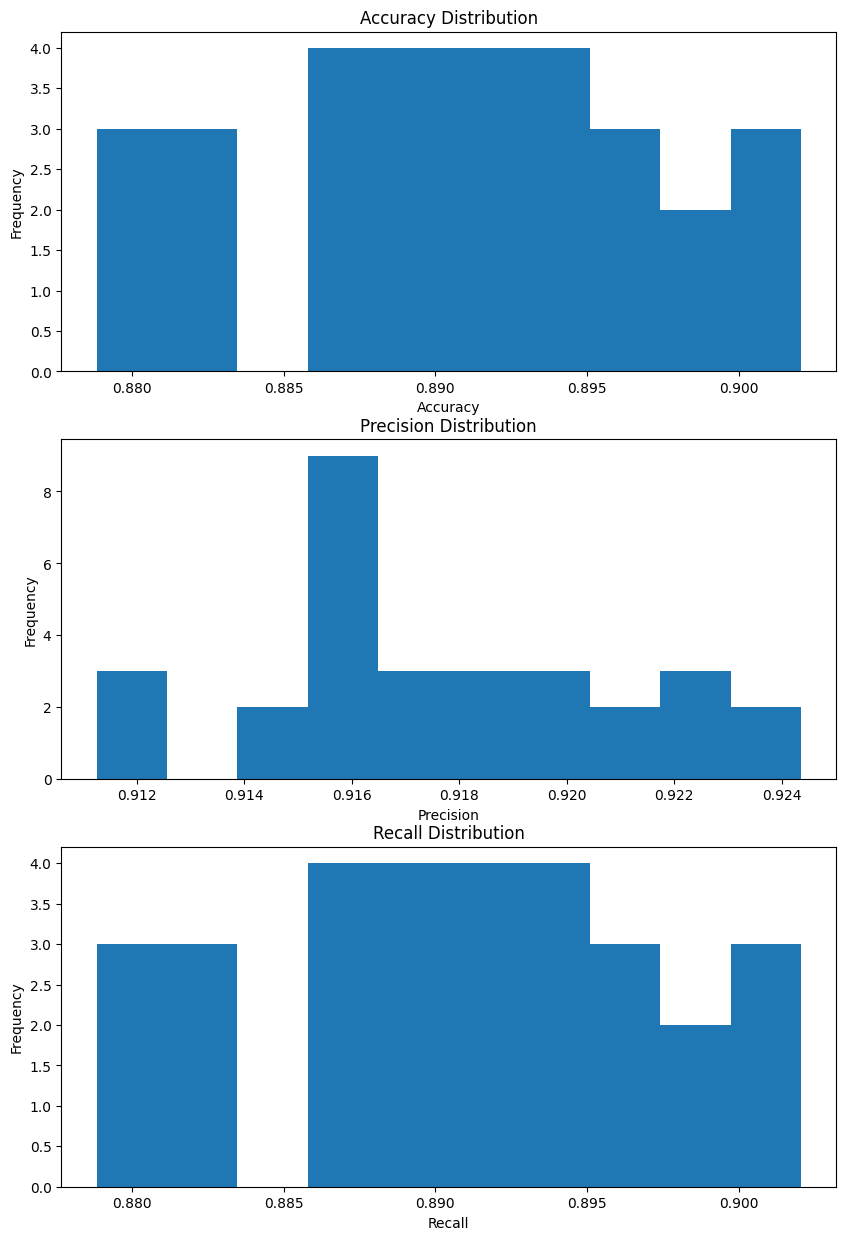

In [87]:
import warnings
warnings.simplefilter("ignore")

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

accuracy = []
precisions = []
recalls = []

for i in range(0,30):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)

    # Add model to the data(Decision Tree)
    DT = DecisionTreeClassifier(min_samples_split=10)

    # Apply SMOTE using imblearn on X_train
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Train the model on the SMOTE-generated X_train
    DT.fit(X_train_smote, y_train_smote)

    # Make predictions using the test set
    y_pred = DT.predict(X_test)

    # Calculate accuracy, precision, and recall
    acc = accuracy_score(y_test, y_pred)
    precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    # Store the scores for each iteration
    accuracy.append(acc)
    precisions.append(precision)
    recalls.append(recall)

# Plot the distributions
fig, axs = plt.subplots(3, figsize=(10, 15))

axs[0].hist(accuracy)
axs[0].set_title("Accuracy Distribution")
axs[0].set_xlabel("Accuracy")
axs[0].set_ylabel("Frequency")

axs[1].hist(precisions)
axs[1].set_title("Precision Distribution")
axs[1].set_xlabel("Precision")
axs[1].set_ylabel("Frequency")

axs[2].hist(recalls)
axs[2].set_title("Recall Distribution")
axs[2].set_xlabel("Recall")
axs[2].set_ylabel("Frequency")

plt.show()


# (5 pts) Comments on the repeated experiment
Make some comments about what you saw! Feel free to run 100 or 1000 times if it runs fast enough 😏

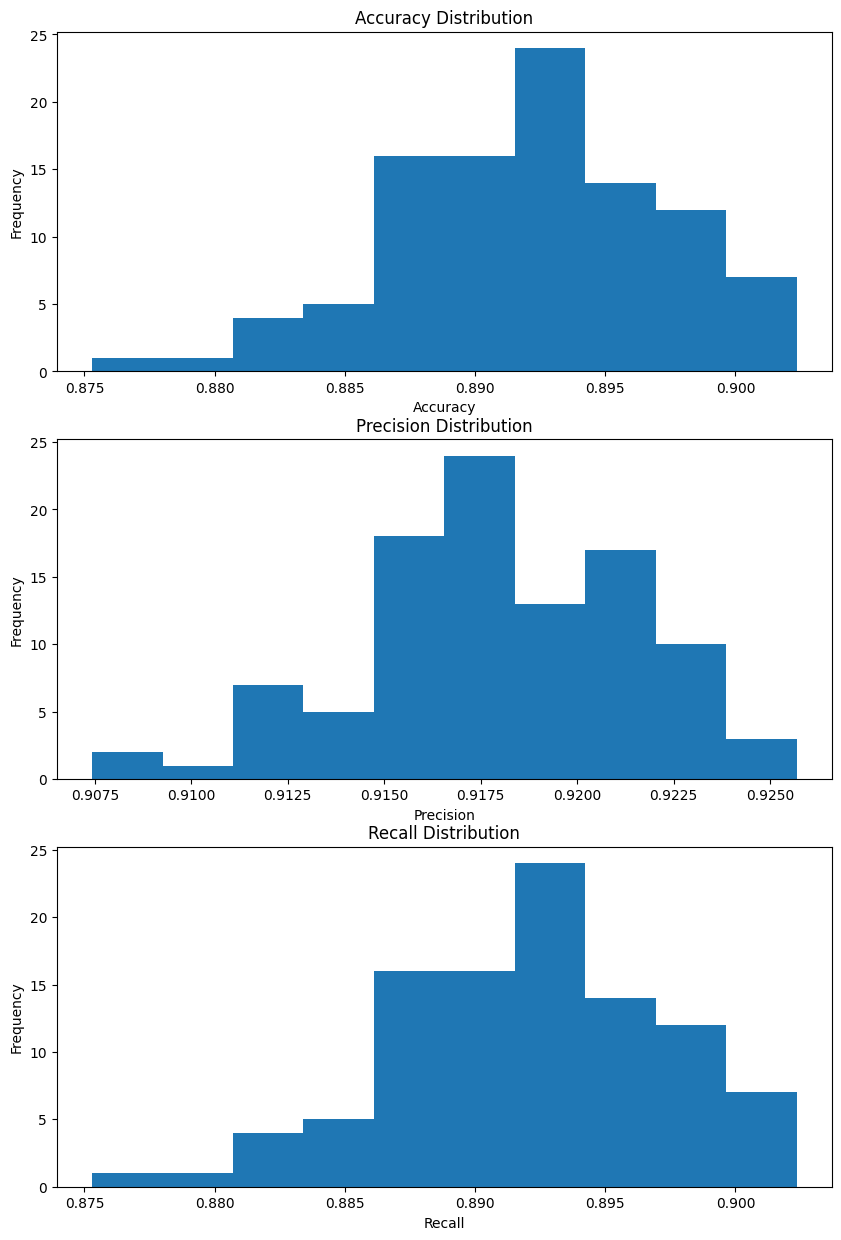

In [88]:
import warnings
warnings.simplefilter("ignore")

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
accuracy = []
precisions = []
recalls = []

for i in range(0,100):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)

    # Add model to the data(Decision Tree)
    DT = DecisionTreeClassifier(min_samples_split=10)

    # Apply SMOTE using imblearn on X_train
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Train the model on the SMOTE-generated X_train
    DT.fit(X_train_smote, y_train_smote)

    # Make predictions using the test set
    y_pred = DT.predict(X_test)

    # Calculate accuracy, precision, and recall
    acc = accuracy_score(y_test, y_pred)
    precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    # Store the scores for each iteration
    accuracy.append(acc)
    precisions.append(precision)
    recalls.append(recall)

# Plot the distributions
fig, axs = plt.subplots(3, figsize=(10, 15))

axs[0].hist(accuracy)
axs[0].set_title("Accuracy Distribution")
axs[0].set_xlabel("Accuracy")
axs[0].set_ylabel("Frequency")

axs[1].hist(precisions)
axs[1].set_title("Precision Distribution")
axs[1].set_xlabel("Precision")
axs[1].set_ylabel("Frequency")

axs[2].hist(recalls)
axs[2].set_title("Recall Distribution")
axs[2].set_xlabel("Recall")
axs[2].set_ylabel("Frequency")

plt.show()